# EDA : LEADING CLUB LENDING CASE

## Importing the Libraries and Loading the data

In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the data into the pandas library
loan_df=pd.read_csv("loan.csv",low_memory=False)

Let us check the size, shape and metadata about the data

In [3]:
print("the shape of the dataframe is:\n\t ",loan_df.shape)
print("\n\n")
print("the len of the dataframe is\n\t  ",len(loan_df))

the shape of the dataframe is:
	  (39717, 111)



the len of the dataframe is
	   39717


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning and Data Manipulation

now check all the columns for all the nan values
the recent python libraries just ignore the nan values hance we are encouraged to keep the data as is but as we are doing expolratory data analysis hence the extracolumns which have all the nan values are just taking up space and make my mannual analysis difficult.
simply put i have reduced tghe column so i can have a better understanding of the remaninng column.

In [5]:
list1=loan_df.isna().all()
list1=list(list1[list1==True].index)
print("list of all columns that are all null:")
print(list1)
print("\n")
print("the length of the columns having only Nan values",len(list1))

list of all columns that are all null:
['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', '

so the above columns will be droped form the dataframe you can do this in multiple ways 
1. df.drop
2. df.dropna

In [6]:
#dropping all the columns where all hte values are Nan
loan_df.dropna(axis=1,how="all",inplace=True)
#where the whole row is empty
loan_df.dropna(axis=0,how="all",inplace=True)
#all the row is filled with some or the other value
print(loan_df.shape)

(39717, 57)


#### Dropping the value current form the target variable loan_status

In [7]:
alist=loan_df[loan_df["loan_status"]=="Current"].index

In [8]:
loan_df.drop(alist,inplace=True)

#### Removing the columns with only 1 unique values

but before dropping we will make a subset of the all the columns if later on we need it at all

In [9]:
loan_df.nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25803
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

In [10]:
list1=loan_df.nunique()
list1=list(list1[list1==1].index)   # --> list1 consists of all the not unique column names
print(len(list1))


#loadin the data into the data frame
datadict=pd.read_excel("Data_Dictionary.xlsx")
#reading the data dictionary into the datadict so as to reference the description
datad_dict=datadict.set_index("LoanStatNew").T.to_dict()
#sub data frame consisting of no unique values so we can use it later if required
sub_df=loan_df[list1]
# Dropping the not unique variables from the data set
loan_df.drop(columns=list1,inplace=True)

11


C:\Users\shray\AppData\Local\Temp/ipykernel_18232/1136680104.py:9: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  datad_dict=datadict.set_index("LoanStatNew").T.to_dict()


so here is the Variable that weren't unique and thier description

In [11]:
#just to check what is what
for i in list1:
    print(i,":",datad_dict[i])      #---> just a simple for loop to read out the description of the not unique columns

pymnt_plan : {'Description': 'Indicates if a payment plan has been put in place for the loan'}
initial_list_status : {'Description': 'The initial listing status of the loan. Possible values are – W, F'}
out_prncp : {'Description': 'Remaining outstanding principal for total amount funded'}
out_prncp_inv : {'Description': 'Remaining outstanding principal for portion of total amount funded by investors'}
collections_12_mths_ex_med : {'Description': 'Number of collections in 12 months excluding medical collections'}
policy_code : {'Description': 'publicly available policy_code=1\nnew products not publicly available policy_code=2'}
application_type : {'Description': 'Indicates whether the loan is an individual application or a joint application with two co-borrowers'}
acc_now_delinq : {'Description': 'The number of accounts on which the borrower is now delinquent.'}
chargeoff_within_12_mths : {'Description': 'Number of charge-offs within 12 months'}
delinq_amnt : {'Description': 'The past-d

#### The Metadata for the Data frame

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status   

Upon further review of the dictionary we can drop
url,desc,emp_title,issue_d,zipcode,last_pymnt_d,last_pymnt_amnt,next_pymnt_d
these columns are not required for our analysis

In [13]:
column_drop=["url","desc","emp_title","issue_d","zip_code","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","mths_since_last_delinq","mths_since_last_record"]
loan_df.drop(columns=column_drop,inplace=True)

#### Standardizing and converting the values

Standardizing and Converting the values of the columns:<br>
 1.emp_length<br>
 2.int_rate

In [14]:
# standardizing th emp_lengrth
loan_df["emp_length"].fillna(loan_df["emp_length"].mode()[0],inplace=True)
loan_df["emp_length"]=[i.split()[1] if "<" in i else i.split()[0] for i in loan_df["emp_length"]]

In [15]:
loan_df["emp_length"]=["10" if "+" in i else i for i in loan_df["emp_length"]] 

In [16]:
loan_df["emp_length"]

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38577, dtype: object

In [17]:
loan_df["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

In [18]:
loan_df["int_rate"]=[float(i[:-1]) for i in loan_df["int_rate"]]

In [19]:
loan_df["int_rate"]

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [20]:
loan_df.info()#--> just to check finally before diving in analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  float64
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_length               38577 non-null  object 
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  loan_status           

### Univariate Analysis

So let us begin our Univariate Analysis<br>
first finding out wehther the columns "loan_amnt" and "finded_amnt"<br>
are the same or not

In [21]:
# finding out whether loan_amnt and fund_amt are equal
a=loan_df["loan_amnt"]==loan_df["funded_amnt"]
a=list(a[a==False].index)

In [22]:
loan_df.loc[a,["loan_amnt","funded_amnt"]]

,loan_amnt,funded_amnt
61,17500,8950
66,12500,8925
70,20975,13575
77,7250,7200
80,35000,22075
...,...,...
39533,10000,6000
39593,20000,4800
39600,4000,1000
39601,12000,5000


So this shows us that the values aren't same

In [23]:
a=loan_df["loan_amnt"].value_counts()#--> checkinbg for unique values in loan

In [24]:
a

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: loan_amnt, Length: 870, dtype: int64

Univariate analusis of the loan amount

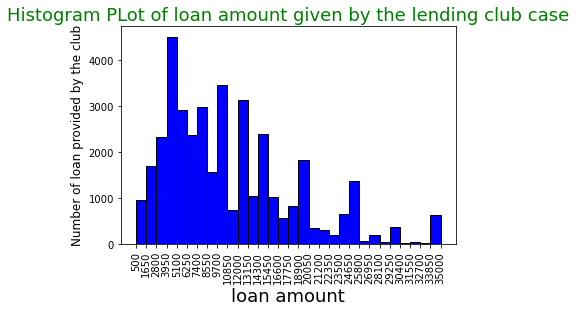






Information about loan amount
the lowest amount of loan provided is : 500
the highest amount of loan provided is : 35000
the median amount of the loan provided is : 9600.0
the 25% amount of the loan provided is : 5300.0
the 75% amount of the loan provided is : 15000.0


In [25]:
out1,bins,out3=plt.hist(loan_df["loan_amnt"],bins=30,edgecolor="black",color="blue")
plt.title("Histogram PLot of loan amount given by the lending club case",fontdict={"fontsize":18,"fontweight":7,"color":"Green"})
plt.xlabel("loan amount",fontdict={"fontsize":18,"fontweight":5,'color':"black"})
plt.ylabel("Number of loan provided by the club",fontdict={"fontsize":12,"fontweight":5,'color':"black"})
plt.xticks(bins,rotation=90)
plt.savefig("loan amount hist.jpeg",bbox_inches='tight')
plt.show()


print("\n\n\n\n")
print("Information about loan amount")
print("the lowest amount of loan provided is :",loan_df["loan_amnt"].min())
print("the highest amount of loan provided is :",loan_df["loan_amnt"].max())
print("the median amount of the loan provided is :",np.quantile(sorted(loan_df["loan_amnt"]),0.5))
print("the 25% amount of the loan provided is :",np.quantile(sorted(loan_df["loan_amnt"]),0.25))
print("the 75% amount of the loan provided is :",np.quantile(sorted(loan_df["loan_amnt"]),0.75))


checkin whether both the id and member_id are all unique<br>
or there is a person who has taken many loans

In [26]:
loan_df["id"].value_counts()

1077501    1
562133     1
558545     1
562256     1
562224     1
          ..
774290     1
774295     1
772732     1
774265     1
87023      1
Name: id, Length: 38577, dtype: int64

In [27]:
loan_df["member_id"].value_counts()

1296599    1
723395     1
719001     1
723527     1
723494     1
          ..
976453     1
976458     1
974723     1
976427     1
86999      1
Name: member_id, Length: 38577, dtype: int64

so the id amd memeber_id are all unique elements and hence we know that there is only one loan per account

Univariate analysis of the "funded_amnt" and "funded_amnt_inv" 

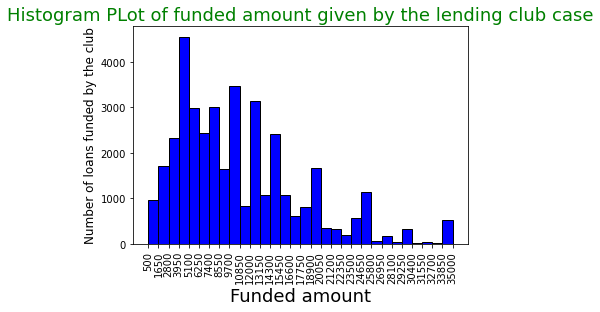






Information about funded amount
the lowest amount of fund provided is : 500
the highest amount of fund provided is : 35000
the median amount of the fund provided is : 9550.0
the 25 percentile amount of the fund provided is : 5200.0
the 75 percetile  amount of the fund provided is : 15000.0


In [28]:
out1,bins,out3=plt.hist(loan_df["funded_amnt"],bins=30,edgecolor="black",color="blue")
plt.title("Histogram PLot of funded amount given by the lending club case",fontdict={"fontsize":18,"fontweight":7,"color":"Green"})
plt.xlabel("Funded amount",fontdict={"fontsize":18,"fontweight":5,'color':"black"})
plt.ylabel("Number of loans funded by the club",fontdict={"fontsize":12,"fontweight":5,'color':"black"})
plt.xticks(bins,rotation=90)
plt.show()


print("\n\n\n\n")
print("Information about funded amount")
print("the lowest amount of fund provided is :",loan_df["funded_amnt"].min())
print("the highest amount of fund provided is :",loan_df["funded_amnt"].max())
print("the median amount of the fund provided is :",np.quantile(sorted(loan_df["funded_amnt"]),0.5))
print("the 25 percentile amount of the fund provided is :",np.quantile(sorted(loan_df["funded_amnt"]),0.25))
print("the 75 percetile  amount of the fund provided is :",np.quantile(sorted(loan_df["funded_amnt"]),0.75))

Now the univariate analysisof the funded amount investor

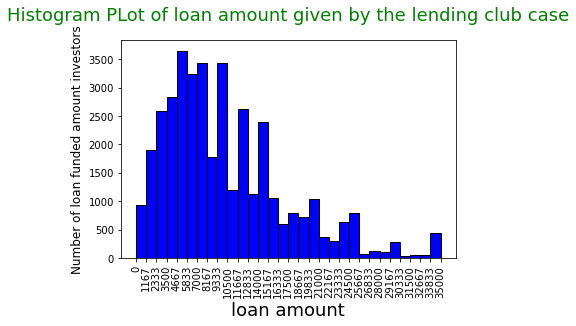






Information about funded amount investors
the lowest amount of loan provided is : 0.0
the highest amount of loan provided is : 35000.0
the median amount of the loan provided is : 8733.44
the 25% amount of the loan provided is : 5000.0
the 75% amount of the loan provided is : 14000.0


In [29]:
out1,bins,out3=plt.hist(loan_df["funded_amnt_inv"],bins=30,edgecolor="black",color="blue")
plt.title("Histogram PLot of loan amount given by the lending club case",fontdict={"fontsize":18,"fontweight":7,"color":"Green"},pad=20)
plt.xlabel("loan amount",fontdict={"fontsize":18,"fontweight":5,'color':"black"})
plt.ylabel("Number of loan funded amount investors",fontdict={"fontsize":12,"fontweight":5,'color':"black"})
plt.xticks(bins,rotation=90)
plt.show()


print("\n\n\n\n")
print("Information about funded amount investors")
print("the lowest amount of loan provided is :",loan_df["funded_amnt_inv"].min())
print("the highest amount of loan provided is :",loan_df["funded_amnt_inv"].max())
print("the median amount of the loan provided is :",np.quantile(sorted(loan_df["funded_amnt_inv"]),0.5))
print("the 25% amount of the loan provided is :",np.quantile(sorted(loan_df["funded_amnt_inv"]),0.25))
print("the 75% amount of the loan provided is :",np.quantile(sorted(loan_df["funded_amnt_inv"]),0.75))

the three varaibles consisting of loan_amount, Funded_amount, Funded_amount_investors<br>
so no suprises there 

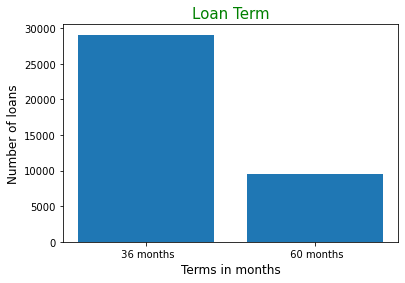

In [30]:
a=loan_df["term"].value_counts()
plt.bar(a.index,a)
plt.title("Loan Term",fontdict={"fontsize":15,"fontweight":7,"color":"green"})
plt.xlabel("Terms in months",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.ylabel("Number of loans",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.savefig("Loan term.jpeg")
plt.show()

so the most of the loan items is given for 3 years rather then 5 years 

### Univariate Analysis of interest rate

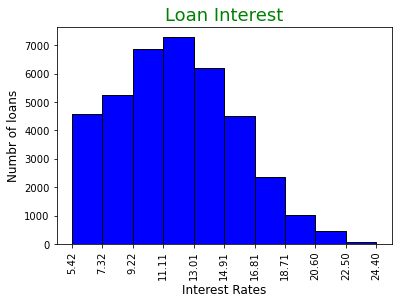






Information about Interest Rate
the lowest interest rate  is : 5.42
the highes interest rate  is : 24.4
the median amount of the loan provided is : 11.71
the 25 percentile of the loan provided is : 8.94
the 75 percemntile of the interest rate : 14.38


In [31]:
out1,bins1,out3=plt.hist(loan_df["int_rate"],bins=10,edgecolor="black",color="blue")
plt.title("Loan Interest",fontdict={"fontsize":18,"fontweight":8,"color":"green"})
plt.xlabel("Interest Rates",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.ylabel("Numbr of loans",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.xticks(bins1,rotation=90)
plt.savefig("Interest rate.jpeg",bbox_inches='tight')
plt.show()



print("\n\n\n\n")
print("Information about Interest Rate")
print("the lowest interest rate  is :",loan_df["int_rate"].min())
print("the highes interest rate  is :",loan_df["int_rate"].max())
print("the median amount of the loan provided is :",np.quantile(sorted(loan_df["int_rate"]),0.5))
print("the 25 percentile of the loan provided is :",np.quantile(sorted(loan_df["int_rate"]),0.25))
print("the 75 percemntile of the interest rate :",np.quantile(sorted(loan_df["int_rate"]),0.75))

### Univariate Analysis installments

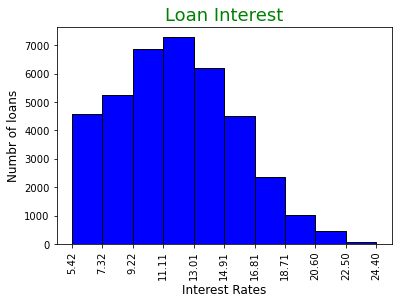






Information about Interest Rate
the lowest interest rate  is : 5.42
the highes interest rate  is : 24.4
the median amount of the loan provided is : 11.71
the 25 percentile of the loan provided is : 8.94
the 75 percemntile of the interest rate : 14.38


In [32]:
out1,bins1,out3=plt.hist(loan_df["int_rate"],bins=10,edgecolor="black",color="blue")
plt.title("Loan Interest",fontdict={"fontsize":18,"fontweight":8,"color":"green"})
plt.xlabel("Interest Rates",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.ylabel("Numbr of loans",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.xticks(bins1,rotation=90)

plt.show()



print("\n\n\n\n")
print("Information about Interest Rate")
print("the lowest interest rate  is :",loan_df["int_rate"].min())
print("the highes interest rate  is :",loan_df["int_rate"].max())
print("the median amount of the loan provided is :",np.quantile(sorted(loan_df["int_rate"]),0.5))
print("the 25 percentile of the loan provided is :",np.quantile(sorted(loan_df["int_rate"]),0.25))
print("the 75 percemntile of the interest rate :",np.quantile(sorted(loan_df["int_rate"]),0.75))

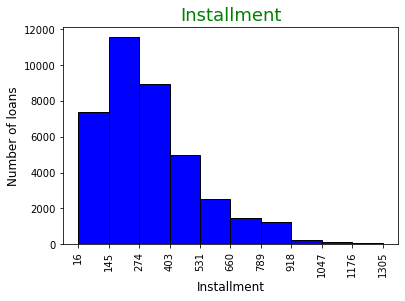






Information about Interest Rate
the lowest installment is : 15.69
the highes installment is : 1305.19
the median amount of the installment is : 277.86
the 25 percentile of the installment is : 165.74
the 75 percemntile of the installment : 425.55


In [33]:
out1,bins1,out3=plt.hist(loan_df["installment"],bins=10,edgecolor="black",color="blue")
plt.title("Installment",fontdict={"fontsize":18,"fontweight":8,"color":"green"})
plt.xlabel("Installment",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.ylabel("Number of loans",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.xticks(bins1,rotation=90)
plt.savefig("Installment.jpeg",bbox_inches="tight")
plt.show()



print("\n\n\n\n")
print("Information about Interest Rate")
print("the lowest installment is :",loan_df["installment"].min())
print("the highes installment is :",loan_df["installment"].max())
print("the median amount of the installment is :",np.quantile(sorted(loan_df["installment"]),0.5))
print("the 25 percentile of the installment is :",np.quantile(sorted(loan_df["installment"]),0.25))
print("the 75 percemntile of the installment :",np.quantile(sorted(loan_df["installment"]),0.75))

C:\Users\shray\AppData\Local\Temp/ipykernel_18232/3345504326.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bobx_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("grades of th loan.jpeg",bobx_inches="tight")


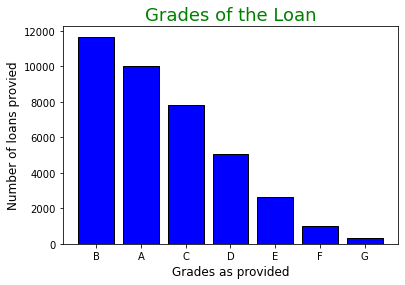

In [34]:
a=loan_df["grade"].value_counts()
plt.bar(a.index,a,edgecolor="black",color="blue")
plt.title("Grades of the Loan",fontdict={"fontsize":18,"fontweight":7,"color":"green"})
plt.xlabel("Grades as provided",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.ylabel("Number of loans provied",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.savefig("grades of th loan.jpeg",bobx_inches="tight")
plt.show()

From the above plot it is interesting to note that<br>
1.grades b go the highest amount of loan issued<br>

C:\Users\shray\AppData\Local\Temp/ipykernel_18232/1047692293.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("subgrades of the loan.jpeg",box_inches='tight')


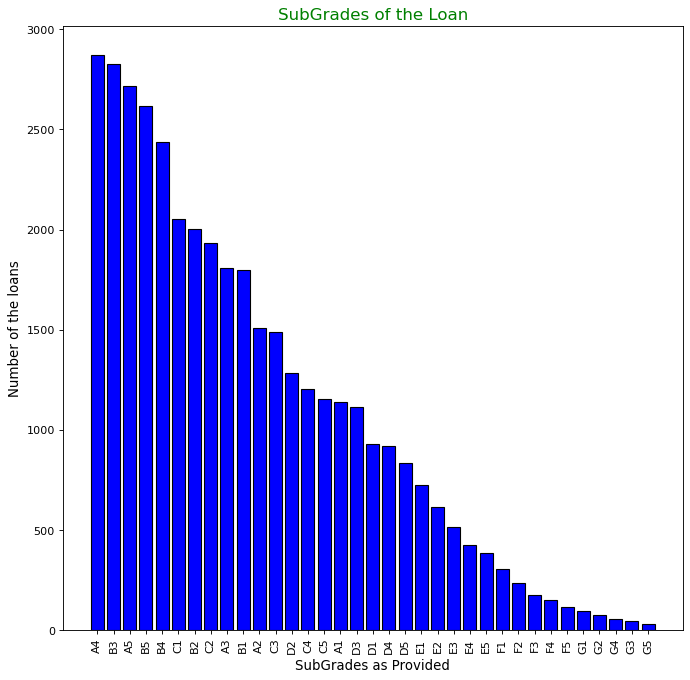

In [35]:
from matplotlib.pyplot import figure
a=loan_df["sub_grade"].value_counts()
figure(figsize=(10,10),dpi=80)
plt.bar(a.index,a,edgecolor="black",color="blue")
plt.title("SubGrades of the Loan",fontdict={"fontsize":15,"fontweight":7,"color":"green"})
plt.xlabel("SubGrades as Provided",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.ylabel("Number of the loans",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.xticks(rotation=90)
plt.savefig("subgrades of the loan.jpeg",box_inches='tight')
plt.show()



Most shocking thing is the subgrade a1 is way lower then expected and i have a theory<br>
if your loan grade is a1 you are not in need of loan<br>
and it is still higher than much lower ones because the lending club because they are accepted more readily

In [36]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

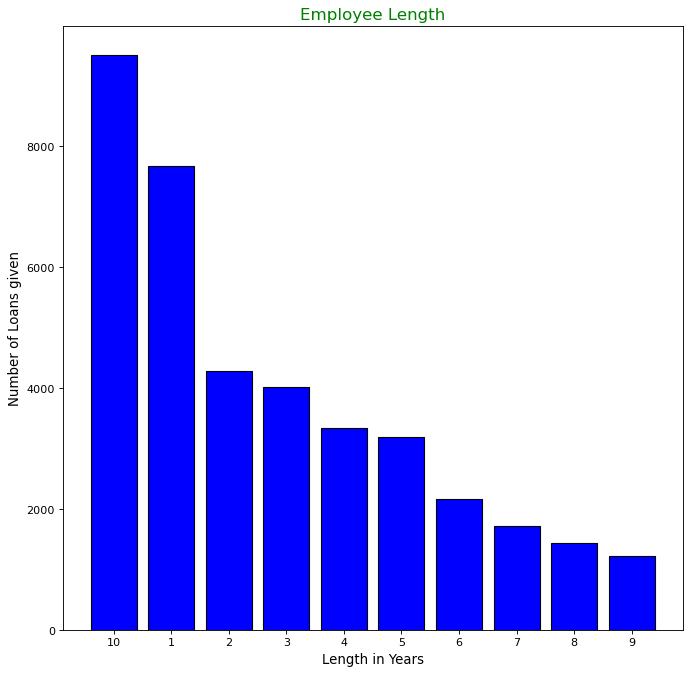

In [37]:
a=loan_df["emp_length"].value_counts()
figure(figsize=(10,10),dpi=80)
plt.bar(a.index,a,edgecolor="black",color="blue")
plt.title("Employee Length",fontdict={"fontsize":15,"fontweight":7,"color":"green"})
plt.xlabel("Length in Years",fontdict={"fontsize":12,"fontweight":5})
plt.ylabel("Number of Loans given",fontdict={"fontsize":12,"fontweight":5})
plt.savefig("Employee length.jpeg",bbox_inches='tight')
plt.show()




Something very peculiar employees with more than 10 years is the highest:<br>
and a very peculiar thing is that than it is in ascending order from 1 to 0

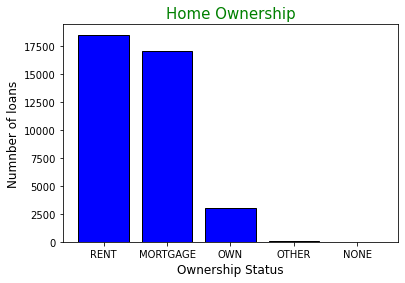

In [38]:
a=loan_df["home_ownership"].value_counts()
plt.bar(a.index,a,edgecolor="black",color="blue")
plt.title("Home Ownership",fontdict={"fontsize":15,"fontweight":7,"color":"green"})
plt.xlabel("Ownership Status",fontdict={"fontsize":12,"fontweight":5})
plt.ylabel("Numnber of loans",fontdict={"fontsize":12,"fontweight":5})
plt.savefig("home ownership.jpeg",bbox_inches='tight')
plt.show()

Again a Search which gives us a idea about the clintele of the lending club

In [39]:
loan_df["title"].value_counts()#----> finding out popular title

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

In [40]:
loan_df["title"].fillna("",inplace=True)#---> filling nan values

In [41]:
loan_df["title"]=["dc" if "consolid" in x else x for x in loan_df["title"]]# putting all consolidation into one

In [42]:
loan_df["title"]=["dc" if "Consolid" in x else x for x in loan_df["title"]]#--> consolid wuth capital C

In [43]:
a=loan_df["title"].value_counts()

In [44]:
a.loc[a.index[0]:a[a==2].index[0]]#--> first element where aa title is equal to 2

dc                          9636
Personal Loan                641
Home Improvement             345
Small Business Loan          305
Credit Card Loan             301
                            ... 
cc payoff                      3
Paying off bills               3
Pay off Credit Card Debt       3
test                           3
Debt ConsolIdation loan        2
Name: title, Length: 891, dtype: int64

In [45]:
loan_df["title"]=["personal loan" if "person" in x else x for x in loan_df["title"]]

In [46]:
a=loan_df["title"].value_counts()
a

dc                        9636
Personal Loan              641
personal loan              576
Home Improvement           345
Small Business Loan        305
                          ... 
Ro's Loan                    1
Discover & Visa Payoff       1
Legal                        1
Be Debt Free                 1
JAL Loan                     1
Name: title, Length: 17061, dtype: int64

In [47]:
loan_df["title"]=["personal loan" if "Person" in x else x for x in loan_df["title"]]

In [48]:
a=loan_df['title'].value_counts()

In [49]:
a

dc                             9636
personal loan                  1950
Home Improvement                345
Small Business Loan             305
Credit Card Loan                301
                               ... 
ccf                               1
La fin des cartes de credit       1
De Cheaper Trash                  1
7300                              1
JAL Loan                          1
Name: title, Length: 16771, dtype: int64

In [50]:
a[:20]

dc                       9636
personal loan            1950
Home Improvement          345
Small Business Loan       305
Credit Card Loan          301
Home Improvement Loan     230
Loan                      206
Wedding Loan              201
Car Loan                  193
Other Loan                180
Credit Card Payoff        150
Wedding                   147
Credit Card Refinance     142
Major Purchase Loan       137
Medical                   117
Credit Card               114
home improvement          106
Credit Cards               91
My Loan                    90
Debt                       84
Name: title, dtype: int64

In [51]:
loan_df["title"]=["credit card" if "Credit" in x else x for x in loan_df["title"]]

In [52]:
a=loan_df["title"].value_counts()
a[:20]

dc                       9636
credit card              2385
personal loan            1950
Home Improvement          345
Small Business Loan       305
Home Improvement Loan     230
Loan                      206
Wedding Loan              201
Car Loan                  193
Other Loan                180
Wedding                   147
Major Purchase Loan       137
Medical                   117
home improvement          106
My Loan                    90
Debt                       84
loan                       82
Business Loan              80
Freedom                    76
Moving Loan                75
Name: title, dtype: int64

In [53]:
a

dc                     9636
credit card            2385
personal loan          1950
Home Improvement        345
Small Business Loan     305
                       ... 
TRAILER LOAN              1
Pheonix                   1
Dee Dee                   1
bilco                     1
JAL Loan                  1
Name: title, Length: 15795, dtype: int64

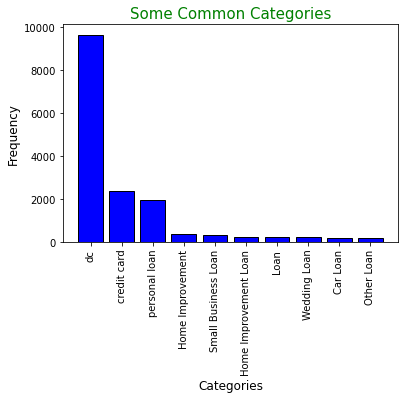

In [54]:
plt.bar(a.index[:10],a[:10],edgecolor="black",color="blue")
plt.title("Some Common Categories",fontdict={"fontsize":15,"fontweight":7,"color":"green"})
plt.xlabel("Categories",fontdict={"fontsize":12,"fontweight":5})
plt.ylabel("Frequency",fontdict={"fontsize":12,"fontweight":5})
plt.xticks(rotation=90)
plt.show()

Most are consolidatin loan the personal and credit card loan

In [55]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [56]:
#print("\n\n\n\n")
print("Information about annual income")
print("the lowest annual income  is :",loan_df["annual_inc"].min())
print("the highes annual income  is :",loan_df["annual_inc"].max())
print("the median amount of the annual income is :",np.quantile(sorted(loan_df["annual_inc"]),0.5))
print("the 25 percentile of the annual income is :",np.quantile(sorted(loan_df["annual_inc"]),0.25))
print("the 75 percemntile of the annual inocme :",np.quantile(sorted(loan_df["annual_inc"]),0.75))
print("the 1st percentile of the annual income is  :",np.quantile(sorted(loan_df["annual_inc"]),0.01))
print("the 99th percentile of the annual income is :",np.quantile(sorted(loan_df["annual_inc"]),0.99))

Information about annual income
the lowest annual income  is : 4000.0
the highes annual income  is : 6000000.0
the median amount of the annual income is : 58868.0
the 25 percentile of the annual income is : 40000.0
the 75 percemntile of the annual inocme : 82000.0
the 1st percentile of the annual income is  : 14400.0
the 99th percentile of the annual income is : 234143.99999999878


In [57]:
loan_df["dti"]

0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 38577, dtype: float64

In [58]:
print(loan_df["dti"].max())
print(loan_df["dti"].min())

29.99
0.0


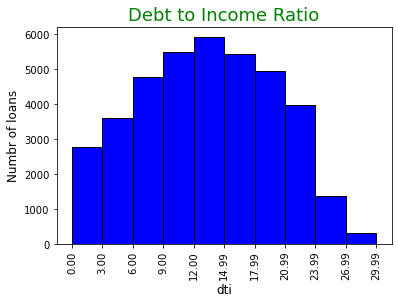






Information about Interest Rate
the lowest interest rate  is : 0.0
the highes interest rate  is : 29.99
the median amount of the loan provided is : 13.37
the 25 percentile of the loan provided is : 8.13
the 75 percemntile of the interest rate : 18.56


In [59]:
out1,bins1,out3=plt.hist(loan_df["dti"],bins=10,edgecolor="black",color="blue")
plt.title("Debt to Income Ratio",fontdict={"fontsize":18,"fontweight":8,"color":"green"})
plt.xlabel("dti",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.ylabel("Numbr of loans",fontdict={"fontsize":12,"fontweight":5,"color":"black"})
plt.xticks(bins1,rotation=90)
plt.savefig("dtu.jpeg",bbox_inches='tight')
plt.show()



print("\n\n\n\n")
print("Information about Interest Rate")
print("the lowest interest rate  is :",loan_df["dti"].min())
print("the highes interest rate  is :",loan_df["dti"].max())
print("the median amount of the loan provided is :",np.quantile(sorted(loan_df["dti"]),0.5))
print("the 25 percentile of the loan provided is :",np.quantile(sorted(loan_df["dti"]),0.25))
print("the 75 percemntile of the interest rate :",np.quantile(sorted(loan_df["dti"]),0.75))

## Segmented Univariate analysis

In [60]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [61]:
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [62]:
print("The number of recoveries based on total loan",len(loan_df[loan_df["loan_status"]=="Fully Paid"])/len(loan_df))

The number of recoveries based on total loan 0.8541358840760038


In [63]:
loan_df["term"]=loan_df["term"].apply(lambda x:x.strip())
a=loan_df.loc[:,["term","loan_status"]]
print("the recovery rate for 3 years is :",len(a[(a["term"]=="36 months") & (a["loan_status"]=="Fully Paid")])/len(a[a["term"]=="36 months"]))
print("the recovery rate for 5 yeas is  :",len(a[(a["term"]=="60 months") & (a["loan_status"]=="Fully Paid")])/len(a[a["term"]=="60 months"]))

the recovery rate for 3 years is : 0.8890912840252956
the recovery rate for 5 yeas is  : 0.7468621453433182


The result were as expected

so, normal rates are (4 to 9]<br>
    moderate rates are (9 to 12]<br>
    high rates are (12 to 14]<br>
    hyper rates are (14 to 24]

In [64]:
a=pd.qcut(loan_df["int_rate"],q=4,precision=0,labels=("normal","moderate","high","hyper"))
data={"Interest_rate":a,"loan_status":loan_df["loan_status"]}
a=pd.concat(data,axis=1)
print("The recovery for normal interest rate   :",len(a[(a["loan_status"]=="Fully Paid") & (a["Interest_rate"]=="normal")])/len(a[a["Interest_rate"]=="normal"]))
print("The recovery for moderate interest rate :",len(a[(a["loan_status"]=="Fully Paid") & (a["Interest_rate"]=="moderate")])/len(a[a["Interest_rate"]=="moderate"]))
print("The recovery for high interest rate     :",len(a[(a["loan_status"]=="Fully Paid") & (a["Interest_rate"]=="high")])/len(a[a["Interest_rate"]=="high"]))
print("The recovery for hyper interest rate    :",len(a[(a["loan_status"]=="Fully Paid") & (a["Interest_rate"]=="hyper")])/len(a[a["Interest_rate"]=="hyper"]))

The recovery for normal interest rate   : 0.9403548123980424
The recovery for moderate interest rate : 0.8819013566095278
The recovery for high interest rate     : 0.8400748674222731
The recovery for hyper interest rate    : 0.7530851394794151


the result were as expected

In [65]:
a=loan_df.loc[:,["grade","sub_grade","loan_status"]]

In [66]:
a["sub_grade"].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [67]:
print("\033[1mThe recovery for \033[4mGrade A\033[0m is :",len(a[(a["grade"]=="A") & (a["loan_status"]=="Fully Paid")])/len(a[a["grade"]=="A"]))
print("\n")
print("the recovery for \033[1msubgrade A1\033[0m is :",len(a[(a["sub_grade"]=="A1") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="A1"]))
print("the recovery for \033[1msubgrade A2\033[0m is :",len(a[(a["sub_grade"]=="A2") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="A2"]))
print("the recovery for \033[1msubgrade A3\033[0m is :",len(a[(a["sub_grade"]=="A3") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="A3"]))
print("the recovery for \033[1msubgrade A4\033[0m is :",len(a[(a["sub_grade"]=="A4") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="A4"]))
print("the recovery for \033[1msubgrade A5\033[0m is :",len(a[(a["sub_grade"]=="A5") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="A5"]))
print("\n\n\n\n")


print("\033[1mThe recovery for \033[4mGrade B\033[0m is :",len(a[(a["grade"]=="B") & (a["loan_status"]=="Fully Paid")])/len(a[a["grade"]=="B"]))
print("\n")
print("the recovery for \033[1msubgrade B1\033[0m is :",len(a[(a["sub_grade"]=="B1") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="B1"]))
print("the recovery for \033[1msubgrade B2\033[0m is :",len(a[(a["sub_grade"]=="B2") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="B2"]))
print("the recovery for \033[1msubgrade B3\033[0m is :",len(a[(a["sub_grade"]=="B3") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="B3"]))
print("the recovery for \033[1msubgrade B4\033[0m is :",len(a[(a["sub_grade"]=="B4") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="B4"]))
print("the recovery for \033[1msubgrade B5\033[0m is :",len(a[(a["sub_grade"]=="B5") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="B5"]))
print("\n\n\n\n")


print("\033[1mThe recovery for \033[4mGrade C\033[0m is :",len(a[(a["grade"]=="C") & (a["loan_status"]=="Fully Paid")])/len(a[a["grade"]=="C"]))
print("\n")
print("the recovery for \033[1msubgrade C1\033[0m is :",len(a[(a["sub_grade"]=="C1") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="C1"]))
print("the recovery for \033[1msubgrade C2\033[0m is :",len(a[(a["sub_grade"]=="C2") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="C2"]))
print("the recovery for \033[1msubgrade C3\033[0m is :",len(a[(a["sub_grade"]=="C3") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="C3"]))
print("the recovery for \033[1msubgrade C4\033[0m is :",len(a[(a["sub_grade"]=="C4") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="C4"]))
print("the recovery for \033[1msubgrade C5\033[0m is :",len(a[(a["sub_grade"]=="C5") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="C5"]))
print("\n\n\n\n")





print("\033[1mThe recovery for \033[4mGrade D\033[0m is :",len(a[(a["grade"]=="D") & (a["loan_status"]=="Fully Paid")])/len(a[a["grade"]=="D"]))
print("\n")
print("the recovery for \033[1msubgrade D1\033[0m is :",len(a[(a["sub_grade"]=="D1") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="D1"]))
print("the recovery for \033[1msubgrade D2\033[0m is :",len(a[(a["sub_grade"]=="D2") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="D2"]))
print("the recovery for \033[1msubgrade D3\033[0m is :",len(a[(a["sub_grade"]=="D3") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="D3"]))
print("the recovery for \033[1msubgrade D4\033[0m is :",len(a[(a["sub_grade"]=="D4") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="D4"]))
print("the recovery for \033[1msubgrade D5\033[0m is :",len(a[(a["sub_grade"]=="D5") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="D5"]))
print("\n\n\n\n")




print("\033[1mThe recovery for \033[4mGrade E\033[0m is :",len(a[(a["grade"]=="E") & (a["loan_status"]=="Fully Paid")])/len(a[a["grade"]=="E"]))
print("\n")
print("the recovery for \033[1msubgrade E1\033[0m is :",len(a[(a["sub_grade"]=="E1") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="E1"]))
print("the recovery for \033[1msubgrade E2\033[0m is :",len(a[(a["sub_grade"]=="E2") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="E2"]))
print("the recovery for \033[1msubgrade E3\033[0m is :",len(a[(a["sub_grade"]=="E3") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="E3"]))
print("the recovery for \033[1msubgrade E4\033[0m is :",len(a[(a["sub_grade"]=="E4") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="E4"]))
print("the recovery for \033[1msubgrade E5\033[0m is :",len(a[(a["sub_grade"]=="E5") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="E5"]))
print("\n\n\n\n")



print("\033[1mThe recovery for \033[4mGrade F\033[0m is :",len(a[(a["grade"]=="F") & (a["loan_status"]=="Fully Paid")])/len(a[a["grade"]=="F"]))
print("\n")
print("the recovery for \033[1msubgrade F1\033[0m is :",len(a[(a["sub_grade"]=="F1") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="F1"]))
print("the recovery for \033[1msubgrade F2\033[0m is :",len(a[(a["sub_grade"]=="F2") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="F2"]))
print("the recovery for \033[1msubgrade F3\033[0m is :",len(a[(a["sub_grade"]=="F3") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="F3"]))
print("the recovery for \033[1msubgrade F4\033[0m is :",len(a[(a["sub_grade"]=="F4") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="F4"]))
print("the recovery for \033[1msubgrade F5\033[0m is :",len(a[(a["sub_grade"]=="F5") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="F5"]))
print("\n\n\n\n")


print("\033[1mThe recovery for \033[4mGrade G\033[0m is :",len(a[(a["grade"]=="G") & (a["loan_status"]=="Fully Paid")])/len(a[a["grade"]=="G"]))
print("\n")
print("the recovery for \033[1msubgrade G1\033[0m is :",len(a[(a["sub_grade"]=="G1") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="G1"]))
print("the recovery for \033[1msubgrade G2\033[0m is :",len(a[(a["sub_grade"]=="G2") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="G2"]))
print("the recovery for \033[1msubgrade G3\033[0m is :",len(a[(a["sub_grade"]=="G3") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="G3"]))
print("the recovery for \033[1msubgrade G4\033[0m is :",len(a[(a["sub_grade"]=="G4") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="G4"]))
print("the recovery for \033[1msubgrade G5\033[0m is :",len(a[(a["sub_grade"]=="G5") & (a["loan_status"]=="Fully Paid")])/len(a[a["sub_grade"]=="G5"]))

The recovery for Grade A is : 0.9400696864111499


the recovery for subgrade A1 is : 0.9736611062335382
the recovery for subgrade A2 is : 0.9509283819628647
the recovery for subgrade A3 is : 0.9430939226519337
the recovery for subgrade A4 is : 0.9380438565958928
the recovery for subgrade A5 is : 0.920073664825046





The recovery for Grade B is : 0.8779443254817987


the recovery for subgrade B1 is : 0.9048414023372288
the recovery for subgrade B2 is : 0.8860569715142429
the recovery for subgrade B3 is : 0.8792920353982301
the recovery for subgrade B4 is : 0.8649979482970865
the recovery for subgrade B5 is : 0.8638623326959847





The recovery for Grade C is : 0.8280571866224151


the recovery for subgrade C1 is : 0.8364963503649635
the recovery for subgrade C2 is : 0.833764888658726
the recovery for subgrade C3 is : 0.8185483870967742
the recovery for subgrade C4 is : 0.824212271973466
the recovery for subgrade C5 is : 0.8197573656845754





The recovery for Grade D is : 0.78013765

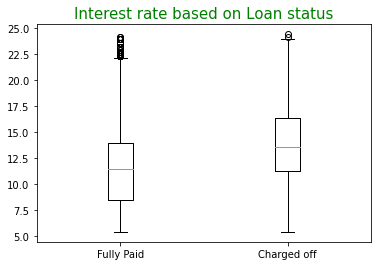

In [68]:
a_f=loan_df[loan_df["loan_status"]=="Fully Paid"]["int_rate"]
a_c=loan_df[loan_df["loan_status"]=="Charged Off"]["int_rate"]
plt.boxplot([a_f,a_c],labels=("Fully Paid","Charged off"))
plt.title("Interest rate based on Loan status",fontdict={"fontsize":15,"fontweight":8,"color":"green"})
plt.show()

Again the result is as expected but there are outliers

In [69]:
print("The recover rate of employee length \033[1m\033[4m10 years\033[0m :",len(loan_df[(loan_df["emp_length"]=="10") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["emp_length"]=="10"]))
print("The recover rate of employee length \033[1m\033[4m9 years\033[0m  :",len(loan_df[(loan_df["emp_length"]=="9") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["emp_length"]=="9"]))
print("The recover rate of employee length \033[1m\033[4m8 years\033[0m  :",len(loan_df[(loan_df["emp_length"]=="8") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["emp_length"]=="8"]))
print("The recover rate of employee length \033[1m\033[4m7 years\033[0m  :",len(loan_df[(loan_df["emp_length"]=="7") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["emp_length"]=="7"]))
print("The recover rate of employee length \033[1m\033[4m6 years\033[0m  :",len(loan_df[(loan_df["emp_length"]=="6") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["emp_length"]=="6"]))
print("The recover rate of employee length \033[1m\033[4m5 years\033[0m  :",len(loan_df[(loan_df["emp_length"]=="5") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["emp_length"]=="5"]))
print("The recover rate of employee length \033[1m\033[4m4 years\033[0m  :",len(loan_df[(loan_df["emp_length"]=="4") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["emp_length"]=="4"]))
print("The recover rate of employee length \033[1m\033[4m3 years\033[0m  :",len(loan_df[(loan_df["emp_length"]=="3") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["emp_length"]=="3"]))
print("The recover rate of employee length \033[1m\033[4m2 years\033[0m  :",len(loan_df[(loan_df["emp_length"]=="2") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["emp_length"]=="2"]))
print("The recover rate of employee length \033[1m\033[4m1 years\033[0m  :",len(loan_df[(loan_df["emp_length"]=="1") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["emp_length"]=="1"]))

The recover rate of employee length 10 years : 0.836256695725239
The recover rate of employee length 9 years  : 0.8711256117455138
The recover rate of employee length 8 years  : 0.8585365853658536
The recover rate of employee length 7 years  : 0.8462887200467563
The recover rate of employee length 6 years  : 0.8583948339483395
The recover rate of employee length 5 years  : 0.8566061365059486
The recover rate of employee length 4 years  : 0.8617594254937163
The recover rate of employee length 3 years  : 0.8616650049850448
The recover rate of employee length 2 years  : 0.867862969004894
The recover rate of employee length 1 years  : 0.8573661586557249


across the whole spectrum of employee length the recovery rate is the same

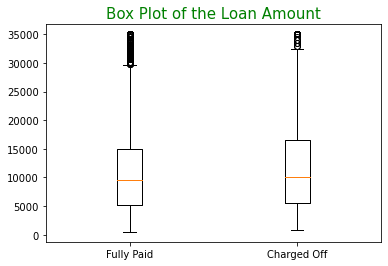

In [70]:
a_f=loan_df[loan_df["loan_status"]=="Fully Paid"]["loan_amnt"]
a_c=loan_df[loan_df["loan_status"]=="Charged Off"]["loan_amnt"]
plt.boxplot([a_f,a_c],labels=("Fully Paid","Charged Off"))
plt.title("Box Plot of the Loan Amount",fontdict={"fontsize":15,"fontweight":8,"color":"green"})
plt.show()

It is Almost Same yes there is variance but almost similar

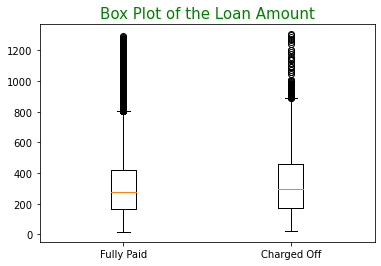

In [71]:
a_f=loan_df[loan_df["loan_status"]=="Fully Paid"]["installment"]
a_c=loan_df[loan_df["loan_status"]=="Charged Off"]["installment"]
plt.boxplot([a_f,a_c],labels=("Fully Paid","Charged Off"))
plt.title("Box Plot of the Loan Amount",fontdict={"fontsize":15,"fontweight":8,"color":"green"})
plt.show()

In [72]:
a=pd.qcut(loan_df["annual_inc"],q=5,precision=0,labels=("low","normal","moderate","high","hyper"))

(65004.0, 90000.0] -----> Low<br>
(37196.0, 50004.0] -----> Normal<br>
(3999.0, 37196.0]  -----> Moderate<br>
(50004.0, 65004.0] -----> High<br>
(90000.0, 6000000.0]----> Hyper<br>
For the column annual income

In [73]:
a=pd.concat([a,loan_df["loan_status"]],axis=1)

In [74]:
a.to_excel("a.xlsx")

In [75]:
print("the recovery rate for \033[1m\033[4mLow amount\033[0m is      :",len(a[(a["annual_inc"]=="low") & (a["loan_status"]=="Fully Paid")])/len(a[a["annual_inc"]=="low"]))
print("the recovery rate for \033[1m\033[4mNormal amount\033[0m is   :",len(a[(a["annual_inc"]=="normal") & (a["loan_status"]=="Fully Paid")])/len(a[a["annual_inc"]=="normal"]))
print("the recovery rate for \033[1m\033[4mModerate amount\033[0m is :",len(a[(a["annual_inc"]=="moderate") & (a["loan_status"]=="Fully Paid")])/len(a[a["annual_inc"]=="moderate"]))
print("the recovery rate for \033[1m\033[4mHigh amount\033[0m is     :",len(a[(a["annual_inc"]=="high") & (a["loan_status"]=="Fully Paid")])/len(a[a["annual_inc"]=="high"]))
print("the recovery rate for \033[1m\033[4mHyper amount\033[0m is    :",len(a[(a["annual_inc"]=="hyper") & (a["loan_status"]=="Fully Paid")])/len(a[a["annual_inc"]=="hyper"]))

the recovery rate for Low amount is      : 0.8168740279937792
the recovery rate for Normal amount is   : 0.8430741503604532
the recovery rate for Moderate amount is : 0.8503711420757911
the recovery rate for High amount is     : 0.8703493504855594
the recovery rate for Hyper amount is    : 0.8907147628590515


In [76]:
a=loan_df["home_ownership"].value_counts()
a.index

Index(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype='object')

In [77]:
print("the recovery rate for \033[1m\033[4mRented House\033[0m is    :",len(loan_df[(loan_df["home_ownership"]=="RENT") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["home_ownership"]=="RENT"]))
print("the recovery rate for \033[1m\033[4mhome mortaged\033[0m is   :",len(loan_df[(loan_df["home_ownership"]=="MORTGAGE") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["home_ownership"]=="MORTGAGE"]))
print("the recovery rate for \033[1m\033[4mhomeowner\033[0m is       :",len(loan_df[(loan_df["home_ownership"]=="OWN") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["home_ownership"]=="OWN"]))
print("the recovery rate for \033[1m\033[4mOther owernship\033[0m is :",len(loan_df[(loan_df["home_ownership"]=="OTHER") & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["home_ownership"]=="OTHER"]))


the recovery rate for Rented House is    : 0.8463744588744588
the recovery rate for home mortaged is   : 0.8632865284060866
the recovery rate for homeowner is       : 0.8510924369747899
the recovery rate for Other owernship is : 0.8163265306122449


In [78]:
a=loan_df["purpose"].value_counts()
for x in a.index:
    print("The Recover rate for\033[1m\033[4m",x,'\033[0m is :',len(loan_df[(loan_df["purpose"]==x) & (loan_df["loan_status"]=="Fully Paid")])/len(loan_df[loan_df["purpose"]==x]))

The Recover rate for debt_consolidation  is : 0.84674605372473
The Recover rate for credit_card  is : 0.8921822160334195
The Recover rate for other  is : 0.8362225097024579
The Recover rate for home_improvement  is : 0.8793043478260869
The Recover rate for major_purchase  is : 0.8967441860465116
The Recover rate for small_business  is : 0.7291904218928165
The Recover rate for car  is : 0.8932621747831888
The Recover rate for wedding  is : 0.896328293736501
The Recover rate for medical  is : 0.8443465491923642
The Recover rate for moving  is : 0.8402777777777778
The Recover rate for vacation  is : 0.8586666666666667
The Recover rate for house  is : 0.8392370572207084
The Recover rate for educational  is : 0.8276923076923077
The Recover rate for renewable_energy  is : 0.8137254901960784


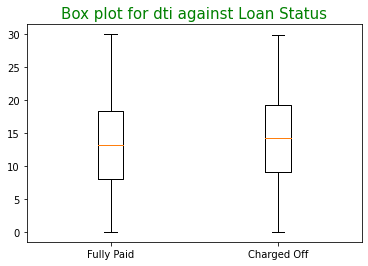

In [79]:
a_f=loan_df[loan_df["loan_status"]=="Fully Paid"]["dti"]
a_c=loan_df[loan_df["loan_status"]=="Charged Off"]["dti"]
plt.boxplot([a_f,a_c],labels=("Fully Paid","Charged Off"))
plt.title("Box plot for dti against Loan Status",fontdict={"fontsize":15,"fontweight":7,"color":"green"})
plt.show()

## Bivariate Analysis 

In [80]:
loan_bi=loan_df.loc[:,["grade","int_rate","loan_amnt","installment","annual_inc","dti"]]

In [81]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [82]:
loan_bi.groupby(by="grade").mean()

,int_rate,loan_amnt,installment,annual_inc,dti
grade,,,,,
A,7.330979,8618.758089,256.950083,66681.565741,12.045246
B,11.007782,10934.783726,319.610696,67561.088141,13.384532
C,13.533565,10815.518892,317.681621,67731.499824,13.852776
D,15.661282,12137.767945,363.333337,68283.875176,13.923591
E,17.630364,15680.116410,426.914855,77791.061491,14.035208
F,19.643494,18095.235656,493.663514,83482.034457,14.207848
G,21.312308,20253.010033,576.277592,94273.316087,14.034615


In [83]:
loan_bi=loan_df.loc[:,["sub_grade","int_rate","loan_amnt","installment","annual_inc","dti"]]
loan_bi.groupby(by="sub_grade").mean()

,int_rate,loan_amnt,installment,annual_inc,dti
sub_grade,,,,,
A1,5.805224,7261.040386,219.862256,67066.392318,10.753064
A2,6.378733,7361.306366,220.458521,66229.615458,11.537076
A3,7.164552,7886.698895,234.946746,66362.417182,12.014050
A4,7.660428,9319.822485,277.932001,66092.153432,12.385778
A5,8.262302,9632.955801,285.243746,67607.629834,12.530048
B1,10.004925,9700.820812,298.162632,64158.371681,12.793105
B2,10.486097,10396.226887,313.512234,67673.528221,13.044323
B3,10.981062,11392.716814,330.224722,70465.774673,13.408064
B4,11.392548,11199.446040,318.931707,67717.901432,13.669159


In [84]:
loan_bi=loan_df.loc[:,["term","int_rate","loan_amnt","installment","annual_inc","dti"]]
loan_bi.groupby(by="term").mean()

,int_rate,loan_amnt,installment,annual_inc,dti
term,,,,,
36 months,11.004656,9592.936314,311.693307,67169.950441,12.982538
60 months,14.778791,15509.442569,355.527338,73712.795344,14.163281


In [85]:
loan_bi=loan_df.loc[:,["emp_length","int_rate","loan_amnt","installment","annual_inc","dti"]]
loan_bi.groupby(by="emp_length").mean()

,int_rate,loan_amnt,installment,annual_inc,dti
emp_length,,,,,
1,11.916058,9772.098476,292.953548,61382.661478,12.746527
10,11.836024,12331.911039,350.255484,77699.422804,13.551419
2,11.998411,10124.557213,302.464987,63097.114847,13.057730
3,11.956859,10636.746012,313.030376,66694.122363,13.151508
4,12.085838,10839.332735,319.701086,66615.882687,13.162609
5,11.966102,11114.081090,323.980006,68022.083303,13.385977
6,11.960789,11372.497694,327.112555,68014.232874,13.810839
7,12.087358,11565.108124,337.321648,69211.802291,13.653402
8,11.812718,11741.550523,339.850488,74425.050132,13.763728


In [86]:
loan_bi=loan_df.loc[:,["purpose","int_rate","loan_amnt","installment","annual_inc","dti"]]
loan_bi.groupby(by="purpose").mean()

,int_rate,loan_amnt,installment,annual_inc,dti
purpose,,,,,
car,10.457985,6746.731154,190.574596,61968.900294,11.084049
credit_card,11.623772,11571.414362,345.932278,70329.557048,14.564724
debt_consolidation,12.396510,12503.457491,364.114633,67078.554784,14.428327
educational,11.650831,6810.461538,218.109754,53471.374092,11.206185
home_improvement,11.288056,11308.000000,319.339482,89497.252675,11.119350
house,12.163569,12753.405995,367.046403,76757.602616,10.575341
major_purchase,10.796698,8072.604651,235.374219,66501.616926,10.769572
medical,11.432276,8122.760646,234.798355,67497.793877,12.197063
moving,11.531771,6568.012153,194.422240,61975.804080,11.665990


In [87]:
loan_numeric=loan_df.select_dtypes(include=["float64","int64"])

In [88]:
loan_numeric.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
id,1.000000,0.993534,0.120614,0.131283,0.231603,0.053936,0.076088,0.005572,0.091785,-0.008417,...,0.001357,0.039902,0.110432,0.194832,0.092979,0.123268,-0.055789,0.038686,-0.010916,-0.007997
member_id,0.993534,1.000000,0.120393,0.130307,0.241324,0.050808,0.070918,0.006442,0.092910,-0.007905,...,-0.001983,0.042217,0.111810,0.205195,0.093773,0.126660,-0.058497,0.036526,-0.012831,-0.007346
loan_amnt,0.120614,0.120393,1.000000,0.981790,0.937922,0.301265,0.932260,0.268999,0.062436,-0.031951,...,0.314022,0.256179,0.881910,0.847635,0.845870,0.728343,0.047103,0.142789,0.077005,-0.035981
funded_amnt,0.131283,0.130307,0.981790,1.000000,0.956172,0.304930,0.958035,0.264798,0.062194,-0.031866,...,0.306501,0.250551,0.898709,0.864501,0.864082,0.736654,0.049465,0.143452,0.078769,-0.036995
funded_amnt_inv,0.231603,0.241324,0.937922,0.956172,1.000000,0.297473,0.905464,0.251981,0.070663,-0.038171,...,0.286265,0.242715,0.874730,0.909127,0.838587,0.726736,0.029379,0.130997,0.064282,-0.041193
int_rate,0.053936,0.050808,0.301265,0.304930,0.297473,1.000000,0.277203,0.048899,0.110913,0.158479,...,0.094179,-0.046539,0.290661,0.284932,0.174717,0.521233,0.094319,0.128596,0.070013,0.083027
installment,0.076088,0.070918,0.932260,0.958035,0.905464,0.277203,1.000000,0.267842,0.052038,-0.019755,...,0.309501,0.229860,0.858493,0.817665,0.847762,0.642655,0.058387,0.121463,0.077519,-0.033361
annual_inc,0.005572,0.006442,0.268999,0.264798,0.251981,0.048899,0.267842,1.000000,-0.121530,0.022229,...,0.277374,0.234534,0.256313,0.245198,0.256848,0.185056,0.006814,0.022184,0.015981,-0.016224
dti,0.091785,0.092910,0.062436,0.062194,0.070663,0.110913,0.052038,-0.121530,1.000000,-0.033347,...,0.228090,0.229119,0.059274,0.066277,0.036755,0.103104,-0.011412,0.026162,0.011744,0.005966
delinq_2yrs,-0.008417,-0.007905,-0.031951,-0.031866,-0.038171,0.158479,-0.019755,0.022229,-0.033347,1.000000,...,-0.054437,0.066994,-0.023130,-0.029608,-0.038447,0.023778,0.028772,0.012443,0.014077,0.003404


## Conclusion :


so the model here works primarily on the grades and sub grades higher the grade higher the interest rate <br>
this how you can reduce the risk:
get the higher grade people for lower rate of interset on higher loan_amount <br>
get attarctive interset rate to higher grade and expand the base for certain purposes<br>
employess working for ten years and above have lower rate of recoveries(peculiar)<br>
